In [38]:
%matplotlib inline


# Underfitting vs. Overfitting

Model used: Linear regression with polynomial features to approximate nonlinear functions. 

In [39]:
import numpy as np  # For numerical calculation and matrix handling
import matplotlib.pyplot as plt  # For plotting


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures  # For pre-processing

from sklearn.linear_model import LinearRegression  # For Linear regression model
from sklearn.model_selection import cross_val_score  # For evaluation


np.random.seed(0)  # To control the random number generator

### Generate data for regression

In [40]:
def gen_target(X):
    return np.cos(1.5 * np.pi * X)

#### Define constants

In [41]:
n_records = 30         # Total number of records
degrees = [1, 4, 30]   # Degree(s) of linear regression model
types = ['Underfitting', 'Perfect fitting', 'Overfitting']

#### Generate features and targets

In [42]:
X = np.sort(np.random.rand(n_records))    # Randomly generate data points (features)
y = gen_target(X) + np.random.randn(n_records) * 0.1  # Generate regression output with additive noise

### Build and Evaluate model

#### Plotting function

The plot shows the true function, the function approximated using linear regression model, and the records with additive noise used for building linear regression model. The model uses polynomial features of different degrees.

In [43]:
def plot_test(X, y, deg, title=""):
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="LR function (deg="+str(deg)+")")
    plt.plot(X_test, gen_target(X_test), '--r', label="True function")
    plt.scatter(X, y, facecolor="b", s=20, label="Training records")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(title)

- **Underfitting:** A linear function (polynomial with degree 1) is not sufficient to fit the training records. 

- **Overfiting:** A polynomial of degree > 1 that approximates the true function almost perfectly and for higher degrees the model learns the noise of the training data. 

**Underfitting**/**Overfitting** can be quantitatively evaluated by using cross-validation to calculate the mean squared error (MSE) on the validation set. The higher MSE, the less likely the model generalizes correctly from the training data.

Degree 1
MSE = 4.077e-01(+/- 4.255e-01) 

Degree 4
MSE = 4.321e-02(+/- 7.078e-02) 

Degree 30
MSE = 3.834e+10(+/- 1.059e+11) 



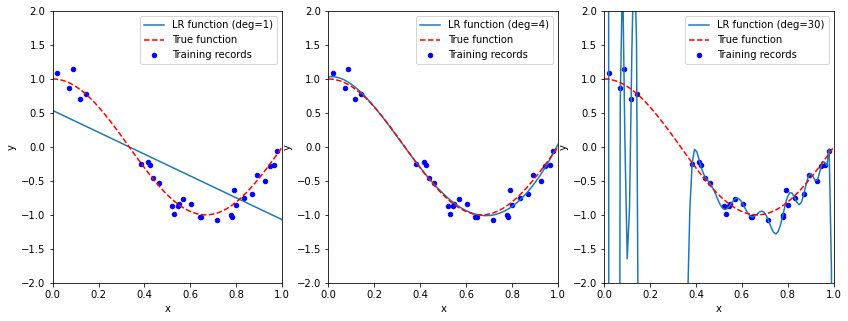

In [44]:
plt.figure(figsize=(14, 5))   # Generate figure window
for i, (deg, t) in enumerate(zip(degrees, types)):
    ax = plt.subplot(1, len(degrees), i + 1)  # Generate subplot for each degreee

    poly_feat = PolynomialFeatures(degree=degrees[i], include_bias=False)
    lr = LinearRegression()
    
    # Make regression pipeline
    pipeline = Pipeline(
        [
            ("poly_feat", poly_feat),
            ("lr", lr),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using 10-fold cross-validation and MSE
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    # Plot results with original data
    plot_test(X, y, deg)
    print("Degree {}\nMSE = {:.3e}(+/- {:.3e}) \n".format(deg, -scores.mean(), scores.std()))
    
plt.show()